# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [76]:
# import libraries here
import pandas as pd
import numpy as np
import time
import regex as re
import seaborn as sns  


# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here

employee = pd.read_csv("./Employee.csv",encoding = "ISO-8859-1")
orders = pd.read_csv("./Orders.csv",encoding = "ISO-8859-1")
temp = pd.read_csv("./Temp_States.csv",encoding = "ISO-8859-1")

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# your answer here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
# your answer here

temp.loc[(temp["State"] == 'New York')]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
# your answer here
a = temp.loc[(temp["State"] == 'New York')]

tempNY = list(a['Temperature'])
tempNY


[19.444444444444443, 9.444444444444443, 3.333333333333333]

In [7]:
np.array(tempNY).mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [54]:
# your answer here
temp.loc[(temp["Temperature"] > 15)]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [56]:
# your answer here
list(temp.loc[(temp["Temperature"] > 15)] ['City'])

['NYC', 'Hartford', 'Treton', 'Newark']

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [57]:
# your answer here
list(temp.loc[(temp["Temperature"] > 15) &(temp["Temperature"] < 20)] ['City'])

['NYC', 'Hartford']

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [72]:
# your answer here
def std_state(State):
    b = temp.loc[(temp["State"] == State)]
    tempSt = list(b['Temperature'])
    
    N=len(tempSt)
    
    media=round(sum(tempSt)/N, 3)
    st_dev = round((sum([(e-media)**2 for e in tempSt])/N)**.5, 3)
    print(f"The state of {State} has a {media} of media and a standard deviation of {st_dev}")
    return 


std_state('New York')
std_state('Connecticut')
std_state('New Jersey')

The state of New York has a 10.741 of media and a standard deviation of 6.641
The state of Connecticut has a 15.833 of media and a standard deviation of 1.389
The state of New Jersey has a 21.111 of media and a standard deviation of 1.111


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [73]:
# your answer here
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [75]:
# your answer here
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

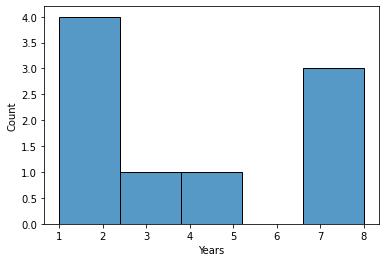

In [81]:
# your answer here
sns.histplot(x=employee.Years);

#### What's the average salary in this company?

In [83]:
# your answer here
np.array(list(employee.Salary)).mean()


48.888888888888886

#### What's the highest salary?

In [84]:
# your answer here
np.array(list(employee.Salary)).max()

70

#### What's the lowest salary?

In [85]:
# your answer here
np.array(list(employee.Salary)).min()

30

#### Who are the employees with the lowest salary?

In [94]:
# your answer here
list(employee.loc[(employee['Salary']==30)]['Name'])

['Maria', 'David']

#### Could you give all the information about an employee called David?

In [96]:
# your answer here
employee.loc[(employee['Name']=='David')]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [100]:
# your answer here
print(f"David´s Salary is {int(employee.loc[(employee['Name']=='David')]['Salary'])}")

David´s Salary is 30


#### Print all the rows where job title is associate

In [104]:
# your answer here
employee.loc[(employee['Title']=='associate')]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [105]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [107]:
# your answer here- 2nd method
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [122]:
# your answer here
employee.loc[(employee['Title']=='associate')&(employee['Salary']>55)]['Name']

7    Pedro
Name: Name, dtype: object

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [127]:
# your answer here
employee.groupby(['Years']).mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [128]:
# your answer here
employee.groupby(['Title']).mean()

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [129]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


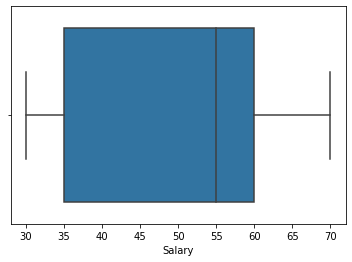

In [136]:
# draw boxplot here
sns.boxplot(x=employee.Salary);

In [140]:
# print first quartile here
np.quantile(employee['Salary'], 0.25)  

35.0

In [142]:
# print third quartile here
np.quantile(employee['Salary'], 0.75)  

60.0

#### Is the mean salary per gender different?

In [145]:
# your answer here
employee.groupby(['Gender']).mean()

,Years,Salary
Gender,,
F,4.0,47.5
M,4.2,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [179]:
# your answer here
a = employee.groupby(['Department']).mean().rename(columns={'Salary':'Salary_mean'})['Salary_mean']
b = employee.groupby(['Department']).max().rename(columns={'Salary':'Salary_max'})['Salary_max']
c = employee.groupby(['Department']).min().rename(columns={'Salary':'Salary_min'})['Salary_min']
max_min_mean=[a,b,c]
min_mean_max = pd.concat(max_min_mean, axis=1, ignore_index=False)
min_mean_max

,Salary_mean,Salary_max,Salary_min
Department,,,
HR,45.00,70,30
IT,48.75,70,30
Sales,55.00,55,55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [182]:
min_mean_max['Computed'] = min_mean_max['Salary_max'] - min_mean_max['Salary_min']
min_mean_max

,Salary_mean,Salary_max,Salary_min,Computed
Department,,,,
HR,45.00,70,30,40
IT,48.75,70,30,40
Sales,55.00,55,55,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [189]:
# your answer here
orders.sample(2)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
334690,454943,575607,21790,2011,11,4,12,vintage snap cards,5,2011-11-10 12:37:00,1.63,14096,United Kingdom,8.15
156738,224189,556507,21755,2011,6,1,9,love building block word,3,2011-06-13 09:55:00,5.95,12567,France,17.85


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [185]:
# your answer here
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [188]:
# your answer here
orders.shape

(397924, 14)

####  What is the average Purchase Price?

In [190]:
# your answer here
#ENTIENDO EL PURCHASE PRICE COMO UNIT PRICE

np.array(list(orders.UnitPrice)).mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [192]:
# your answer here
np.array(list(orders.UnitPrice)).max()

8142.75

In [191]:
# your answer here
np.array(list(orders.UnitPrice)).min()

0.0

#### Select all the customers we have in Spain

In [198]:
# your answer here
print(set(orders.loc[(orders['Country'] == 'Spain')]['CustomerID']))


{12544, 12545, 12417, 12547, 12548, 12421, 12550, 12551, 12546, 12556, 12557, 12442, 12445, 12448, 12450, 12454, 12455, 12462, 12596, 12597, 12354, 12484, 17097, 12502, 12507, 12510, 12538, 12539, 12540, 12541}


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [199]:
# your answer here
len(list(orders.loc[(orders['Country'] == 'Spain')]['CustomerID']))

2485

#### Select all the customers who have bought more than 50 items ?

In [209]:
# your answer here
ordersQuant = orders.groupby(['CustomerID']).sum()
ordersQuant.loc[(ordersQuant['Quantity'] > 50)].head()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,amount_spent
CustomerID,,,,,,,,,
12346,61619,541431,2011,1,2,10,74215,1.04,77183.60
12347,42441700,101296926,365971,1383,441,2219,2458,481.21,4310.00
12348,2807120,16869685,62324,257,111,472,2341,178.71,1797.24
12349,35444274,42165457,146803,803,73,657,631,605.10,1757.55
12350,1365627,9231629,34187,34,51,272,197,65.30,334.40


#### Select orders from Spain that are above 50 items

In [211]:
# your answer here
orders_spain = orders.loc[(orders['Country'] == 'Spain')]
orders_spain = orders_spain.groupby(['CustomerID']).sum()
orders_spain.loc[(orders['Quantity'] > 50)]

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,amount_spent
CustomerID,,,,,,,,,


#### Select all free orders

In [43]:
# your answer here


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [44]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [45]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [46]:
# your answer here

#### Select all orders made in the month of August

In [47]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [48]:
# your answer here

#### What's the  average amount of money spent by country

In [49]:
# your answer here

#### What's the most expensive item?

In [50]:
# your answer here

#### What was the average amount spent per year ?

In [51]:
# your answer here